/run/media/yann/Dumbo/script_py/signal_analysis/Signal_Analysis/Signal_Analysis.py:137: RuntimeWarning: divide by zero encountered in true_divide
  reconstructed_temporal_data = ifft(list_fft_data) / self.hanning_windows_original_signal
/run/media/yann/Dumbo/script_py/signal_analysis/Signal_Analysis/Signal_Analysis.py:137: RuntimeWarning: invalid value encountered in true_divide
  reconstructed_temporal_data = ifft(list_fft_data) / self.hanning_windows_original_signal
/usr/lib64/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


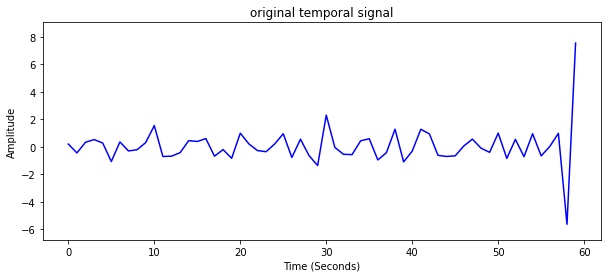

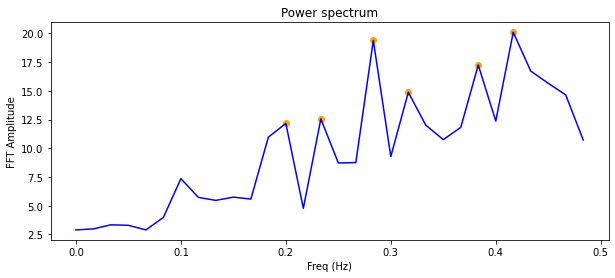

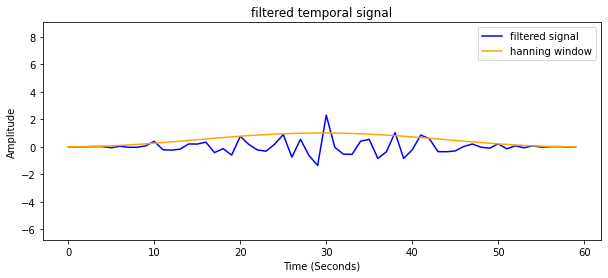

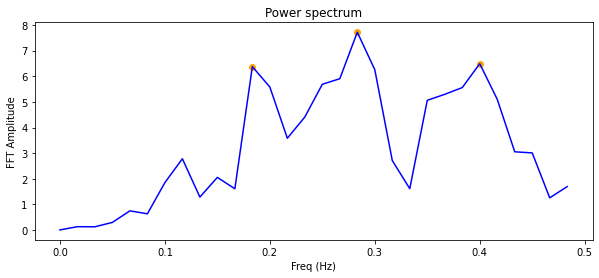

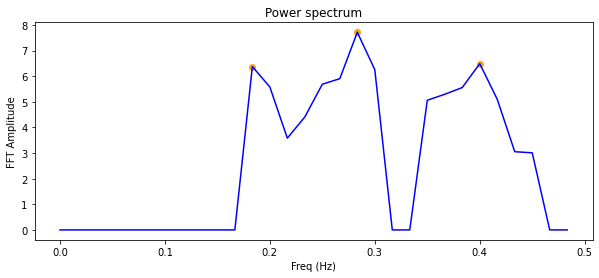

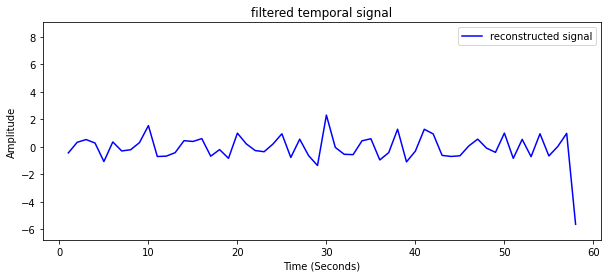

In [1]:
from Signal_Analysis import Signal_Analysis

list_example_data = [
                    0.19629057187017,
                    -0.4474497681607419,
                    0.3268933539412673,
                    0.5231839258114374,
                    0.2720247295208655,
                    -1.073415765069552,
                    0.3508500772797527,
                    -0.3044822256568779,
                    -0.2163833075734157,
                    0.30370942812983,
                    1.538639876352396,
                    -0.7078825347758888,
                    -0.6839258114374034,
                    -0.4304482225656878,
                    0.4420401854714065,
                    0.3848531684698609,
                    0.5911901081916537,
                    -0.6839258114374034,
                    -0.205564142194745,
                    -0.839258114374034,
                    0.9891808346213292,
                    0.2086553323029366,
                    -0.2751159196290572,
                    -0.3601236476043277,
                    0.2009273570324574,
                    0.9435857805255022,
                    -0.7782071097372489,
                    0.5502318392581144,
                    -0.6445131375579598,
                    -1.363214837712519,
                    2.2990726429675425,
                    -0.0463678516228748,
                    -0.5479134466769706,
                    -0.5710973724884081,
                    0.4312210200927357,
                    0.5834621329211747,
                    -0.9574961360123648,
                    -0.4273570324574962,
                    1.2743431221020094,
                    -1.098918083462133,
                    -0.3145285935085008,
                    1.2712519319938178,
                    0.9335394126738796,
                    -0.6267387944358578,
                    -0.7040185471406492,
                    -0.6576506955177743,
                    0.0587326120556414,
                    0.5540958268933539,
                    -0.1012364760432766,
                    -0.4049459041731066,
                    0.9922720247295208,
                    -0.8438948995363215,
                    0.5378670788253478,
                    -0.7210200927357033,
                    0.9451313755795984,
                    -0.6653786707882534,
                    0.0224111282843894,
                    0.9744976816074188,
                    -5.634466769706337,
                    7.534003091190109
                    ]


analysis_sensor_00_seq_0 = Signal_Analysis(list_example_data, sampling_rate=1)

original_signal_x, original_signal_y, original_signal_plot = analysis_sensor_00_seq_0.original_temporal_signal()
original_signal_fft_amplitudes, original_signal_power_spectrum_plot = analysis_sensor_00_seq_0.get_power_spectrum(
                                                                                                    original_signal_y,
                                                                                                    peak_threshold=10)

filtered_signal_x, filtered_signal_y, filtered_signal_plot = analysis_sensor_00_seq_0.filtered_temporal_signal()
filtered_signal_fft_amplitudes, filtered_signal_power_spectrum_plot = analysis_sensor_00_seq_0.get_power_spectrum(
                                                                                                    filtered_signal_y,
                                                                                                    peak_threshold=5)

denoised_filtered_signal_fft_amplitudes, denoised_filtered_signal_power_spectrum_plot = analysis_sensor_00_seq_0.get_power_spectrum(
                                                                                                                    filtered_signal_y,
                                                                                                                    peak_threshold=5,
                                                                                                                    denoised_under_threshold=6)

reconstructed_signal_x, reconstructed_signal_y, reconstructed_signal_plot = analysis_sensor_00_seq_0.reconstructed_temporal_signal(denoised_filtered_signal_fft_amplitudes)

# print(analysis_sensor_00_seq_0.__dict__)
# analysis_sensor_00_seq_0.list_data_point
# df_0['sensor_00'].plot(xlabel = 'time in seconds', ylabel='acceleration', title='signal temporel');

In [3]:
def integrate_serie(serie, time_sec) :
    '''
    Aire sous la courbe
    '''
    return trapz(serie, time_sec)


def get_peak_position(list_x : list, list_y : list, treshold : int) :
    '''
    return a list of tuples with all the peaks position (x,y) greater than a treshold
    '''
    peak_position = argrelextrema(amplitude_oneside, np.greater)
    list_peack_point = []

    for i,j in enumerate(peak_position[0]) :
        point_x = list_x[j]
        point_y = list_y[j]
        if point_y > treshold :
            list_peack_point.append((point_x, point_y))
            
    return list_peack_point

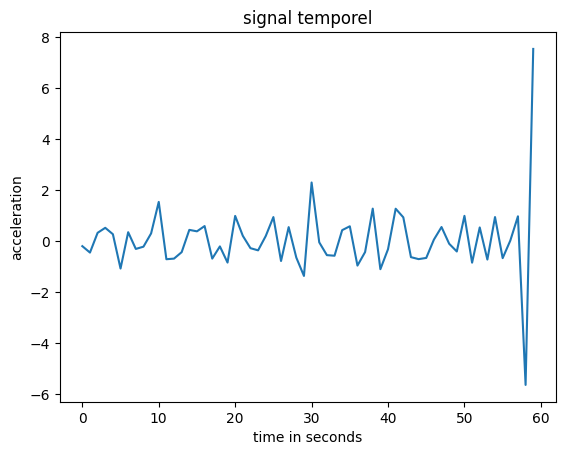

In [4]:
df_0 = df.copy()
df_0 = df_0[df_0['sequence'] == 0]
# df_0['freq'] = df_0.index
# df_0['freq'] = df_0['freq'].apply(lambda x : x/df_0.shape[0])
# df_0.index = pd.to_timedelta(df_0.index, unit='s')
df_0['sensor_00'].plot(xlabel = 'time in seconds', ylabel='acceleration', title='signal temporel');


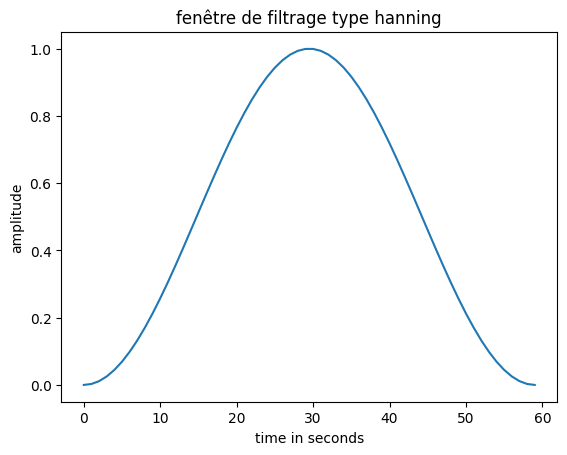

In [5]:

df_0['hanning'] = hann(df_0.shape[0])
df_0['hanning'].plot(xlabel = 'time in seconds', ylabel='amplitude', title='fenêtre de filtrage type hanning');


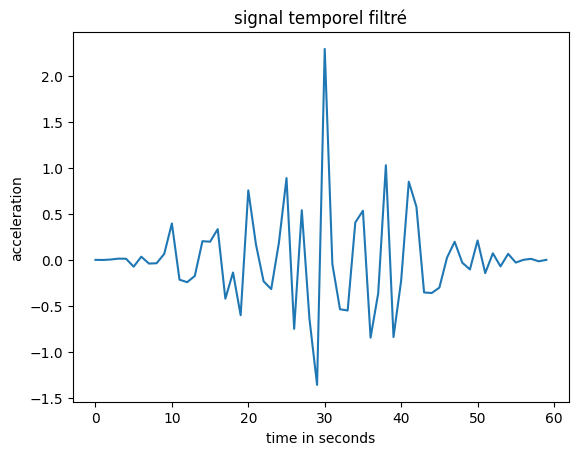

In [6]:
df_0['sensor_00_filtered'] = df_0['sensor_00'] * df_0['hanning']
df_0['sensor_00_filtered'].plot(xlabel = 'time in seconds', ylabel='acceleration', title='signal temporel filtré');

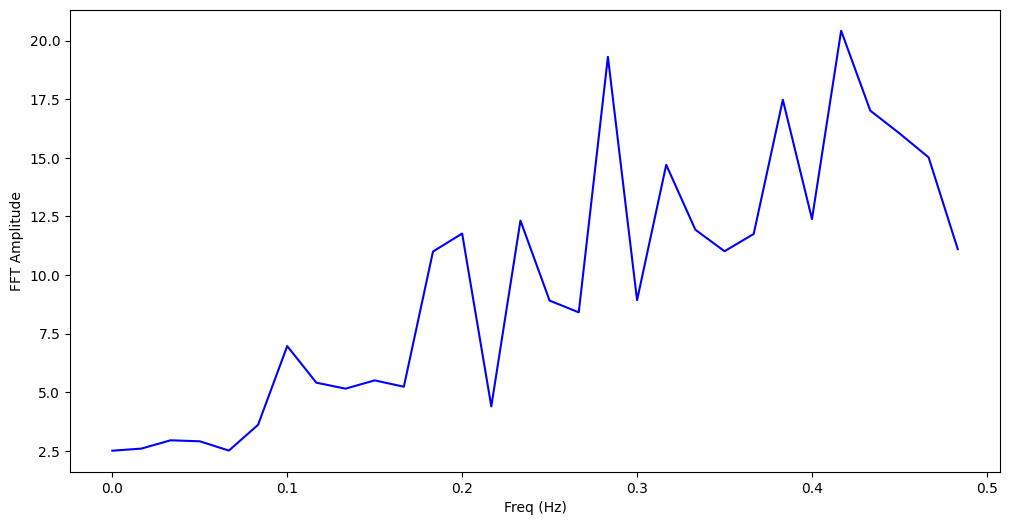

In [7]:

#coefficients complexes de la fft
X = fft(df_0['sensor_00'].tolist(), df_0.shape[0])
#nombre total d'echantillons
N = len(X)
#liste de 0 à N 
n = np.arange(N)
# sampling rate 1 Hz
sr = 1
#temps en seconde 60
T = N/sr
#frequence
freq = n/T
freq = fftfreq(N, 1)#nombre total de point, espace entre chaque point
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude')
plt.show()


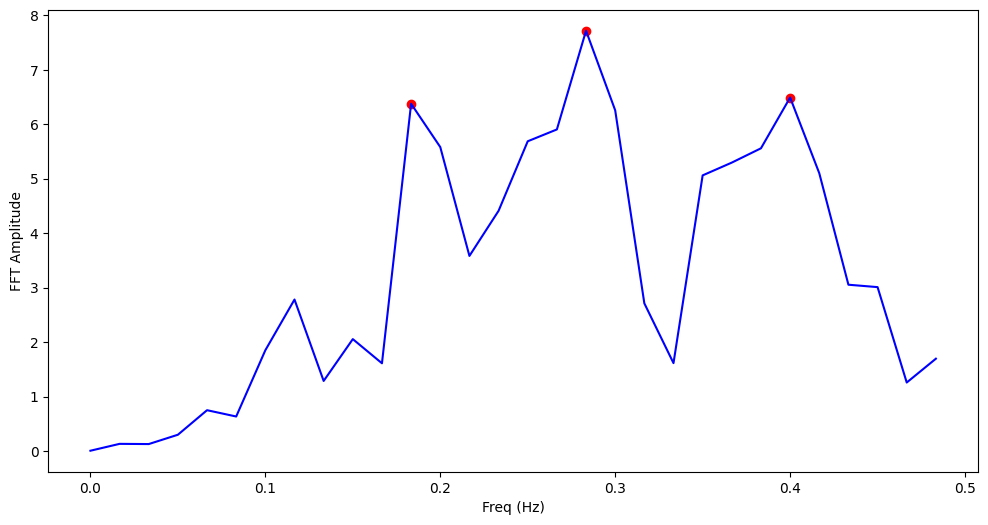

In [8]:
#coefficients complexes de la fft
X = fft(df_0['sensor_00_filtered'].tolist())
#nombre total d'echantillons
N = len(X)
#liste de 0 à N 
n = np.arange(N)
# sampling rate 1 Hz
sr = 1
#temps en seconde 60
T = N/sr
#frequence
freq = n/T
freq = fftfreq(N, 1)#nombre total de point, espace entre chaque point
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]
amplitude_oneside = np.abs(X[:n_oneside])

list_peak_position = get_peak_position(f_oneside, amplitude_oneside, 6)

plt.figure(figsize = (12, 6))
plt.plot(f_oneside, amplitude_oneside, 'b')
plt.scatter(*zip(*list_peak_position), color='red')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude')
plt.show()

In [9]:
#create a signal with noise
dt =0.1
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
f_clean = f
# add noise
f = f +  2.5*np.random.randn(len(t))


f = df_0['sensor_00_filtered'].tolist()
N = len(f)
dt = 1
fhat = np.fft.fft(f,N) # compute fft
PSD = fhat * np.conj(fhat) / N #power spectrum
freq = (1/(dt*N)) * np.arange(N) #create x axis of freq
L = np.arange(1,np.floor(N/2), dtype='int') #only plot the first half

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


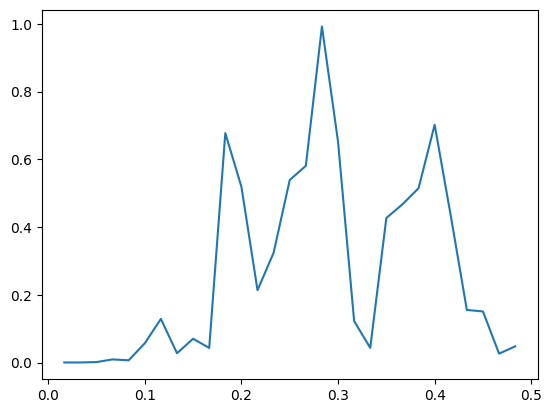

In [12]:
plt.plot(freq[L], PSD[L])

In [55]:
max([0,2,5,4,0,-5,2]) * 1.2

6.0

In [ ]:
import numpy as np
import pandas as pd
from scipy.fftpack import fft,ifft
from scipy.signal import find_peaks,blackman

def sigmoid(range):
    x = np.linspace(-6,+6,range)
    y = 1/(1 + np.exp(-x))
    return -y + 1

# Lowpass filter process
range = 300
y = sigmoid(range)
# kernel = np.ones(len(fourierT))
# kernel[peak:peak+len(y)] = y
# kernel[peak+len(y):] = 0

len(y)

https://medium.com/analytics-vidhya/furier-transform-and-filtering-14b61fdd2560

[0, 0, 0, 5, 4, 8, 5, 6, 5, 4, 0, 0, 5, 3]